# KNN

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#k-NN---K-Nearest-Neighbors-for-classification" data-toc-modified-id="k-NN---K-Nearest-Neighbors-for-classification-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>k-NN - K-Nearest Neighbors for classification</a></span></li><li><span><a href="#k-NN---K-Nearest-Neighbors-for-regression" data-toc-modified-id="k-NN---K-Nearest-Neighbors-for-regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>k-NN - K-Nearest Neighbors for regression</a></span></li><li><span><a href="#kNN-from-scratch---force-brut" data-toc-modified-id="kNN-from-scratch---force-brut-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>kNN from scratch - force brut</a></span><ul class="toc-item"><li><span><a href="#Define-the-dataset" data-toc-modified-id="Define-the-dataset-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Define the dataset</a></span></li><li><span><a href="#Step-1:-Calculate-Euclidean-Distance" data-toc-modified-id="Step-1:-Calculate-Euclidean-Distance-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Step 1: Calculate Euclidean Distance</a></span></li><li><span><a href="#Get-Nearest-Neighbors" data-toc-modified-id="Get-Nearest-Neighbors-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Get Nearest Neighbors</a></span></li><li><span><a href="#Step-3:-Make-Predictions" data-toc-modified-id="Step-3:-Make-Predictions-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Step 3: Make Predictions</a></span></li><li><span><a href="#Cost-of-these-approach" data-toc-modified-id="Cost-of-these-approach-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Cost of these approach</a></span></li></ul></li><li><span><a href="#The-lab-for-today" data-toc-modified-id="The-lab-for-today-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>The lab for today</a></span><ul class="toc-item"><li><span><a href="#Use-kNN-approach-for-sentiment-analysis." data-toc-modified-id="Use-kNN-approach-for-sentiment-analysis.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Use kNN approach for sentiment analysis.</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Embedding-(BOW)" data-toc-modified-id="Embedding-(BOW)-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Embedding (BOW)</a></span></li><li><span><a href="#Model" data-toc-modified-id="Model-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Model</a></span></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Evaluation</a></span></li></ul></li><li><span><a href="#What-is-your-conclusion" data-toc-modified-id="What-is-your-conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>What is your conclusion</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#load-dataset¶" data-toc-modified-id="load-dataset¶-5.0.1"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>load dataset¶</a></span></li><li><span><a href="#Some-explaination-about-columns" data-toc-modified-id="Some-explaination-about-columns-5.0.2"><span class="toc-item-num">5.0.2&nbsp;&nbsp;</span>Some explaination about columns</a></span></li><li><span><a href="#Your-work" data-toc-modified-id="Your-work-5.0.3"><span class="toc-item-num">5.0.3&nbsp;&nbsp;</span>Your work</a></span></li></ul></li></ul></li></ul></div>

In [1]:
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## k-NN - K-Nearest Neighbors for classification

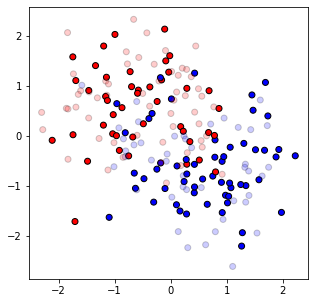

In [2]:
''' define the dataset '''
from sklearn.datasets import make_moons

# Define dataset
X, y = make_moons(n_samples=200, noise=0.4, random_state=0)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=42)

# Plot the training and testing points
plt.figure(figsize=(5, 5))
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.2)
plt.show()

In [3]:
''' Build and use classifier '''
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf = KNeighborsClassifier(n_neighbors=7, p=2)
# p: power parameter for the Minkowski metric.
# p = 1 --> manhattan_distance (l1)
# p = 2 --> euclidean_distance (l2)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# With 2 classes of the same size, accuracy can be used
accuracy_score(y_test, y_pred)

0.8

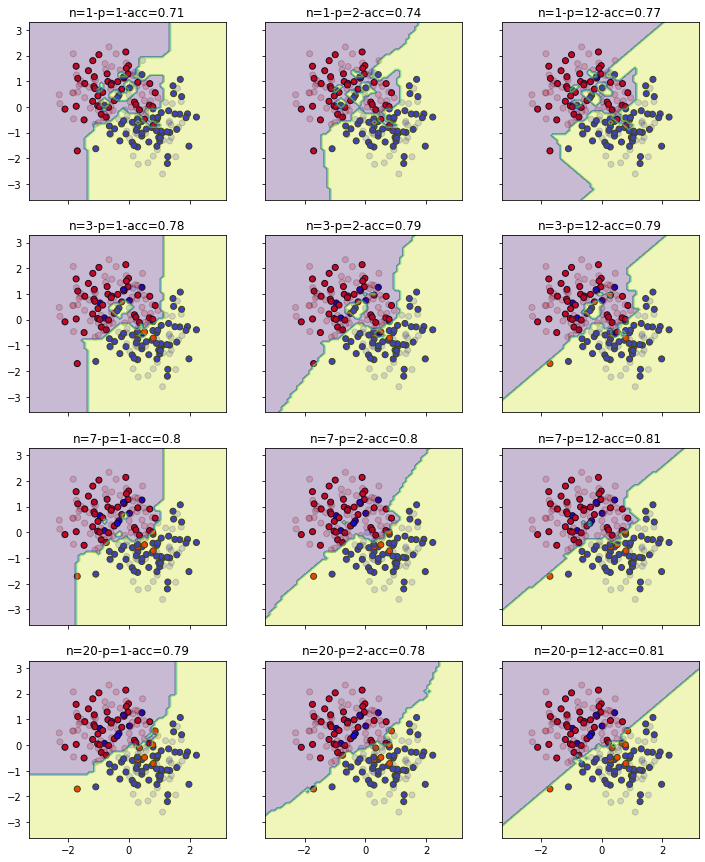

In [4]:
''' Plot the decision regions with different neighbors and distance '''
# change the number of neighbors
n_neighbors = [1, 3, 7, 20]
n_power = [1, 2, 12]

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

fig, ax = plt.subplots(len(n_neighbors), len(n_power), sharex='col', sharey='row', figsize=((len(n_power)+1)*3, (len(n_neighbors)+1)*3))
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

for i, neighbors in enumerate(n_neighbors):
    for j, power in enumerate(n_power):
        clf = KNeighborsClassifier(n_neighbors=neighbors, p=power)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        ax[i, j].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
        ax[i, j].scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=cm_bright, edgecolors='k', alpha=0.2)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax[i, j].contourf(xx, yy, Z, alpha=0.3)
        ax[i, j].set_title("n="+str(neighbors)+"-p="+str(power)+"-acc="+str(accuracy_score(y_test, y_pred)))
plt.show()

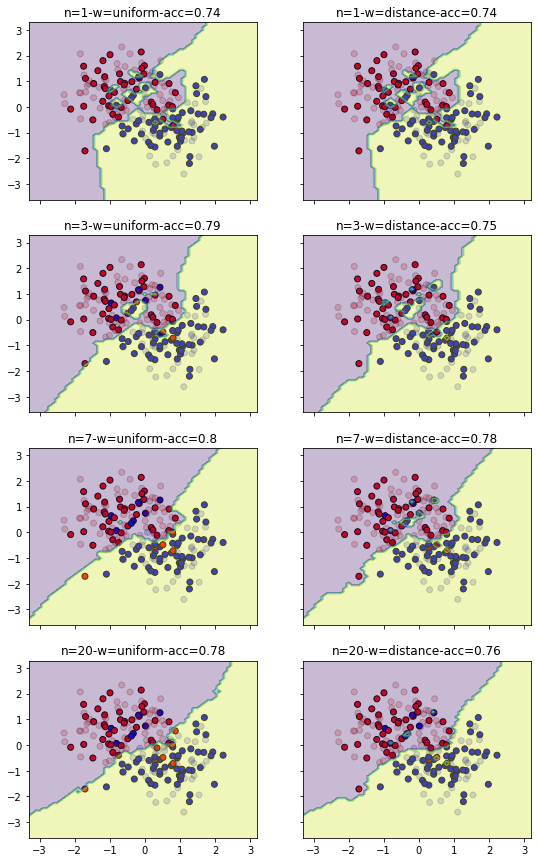

In [5]:
''' Plot the decision regions with different neighbors and weigthed '''
# change the number of neighbors
n_neighbors = [1, 3, 7, 20]
power = 2
n_weights = ['uniform', 'distance']

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

fig, ax = plt.subplots(len(n_neighbors), len(n_weights), sharex='col', sharey='row', figsize=((len(n_weights)+1)*3, (len(n_neighbors)+1)*3))
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

for i, neighbors in enumerate(n_neighbors):
    for j, weights in enumerate(n_weights):
        clf = KNeighborsClassifier(n_neighbors=neighbors, p=power, weights=weights)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        ax[i, j].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
        ax[i, j].scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=cm_bright, edgecolors='k', alpha=0.2)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax[i, j].contourf(xx, yy, Z, alpha=0.3)
        ax[i, j].set_title("n="+str(neighbors)+"-w="+str(weights)+"-acc="+str(accuracy_score(y_test, y_pred)))
plt.show()

## k-NN - K-Nearest Neighbors for regression

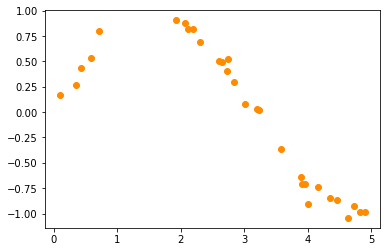

In [6]:
from sklearn.datasets import make_regression

# Define dataset
nb_items = 30
np.random.seed(0)
X_train = np.sort(5 * np.random.rand(nb_items, 1), axis=0)
y_train = np.sin(X_train).ravel() + 0.3*(0.5 - np.random.rand(nb_items))*(np.random.rand(nb_items)<0.7)

X_test = np.linspace(0, 5, 500)[:, np.newaxis]

# Plot the training and testing points
plt.scatter(X_train, y_train, color='darkorange', label='data')
plt.show()

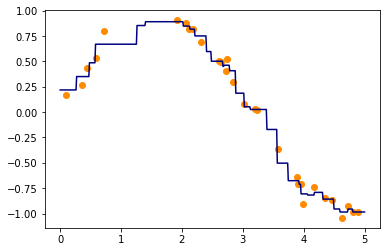

In [7]:
from sklearn.neighbors import KNeighborsRegressor

weights='uniform'
n_neighbors = 2
knn = KNeighborsRegressor(n_neighbors, weights=weights, p=2)
y_ = knn.fit(X_train, y_train).predict(X_test)
y_pred = knn.predict(X_test)

plt.scatter(X_train, y_train, color='darkorange', label='data')
plt.plot(X_test, y_pred, color='navy', label='prediction')
plt.show()

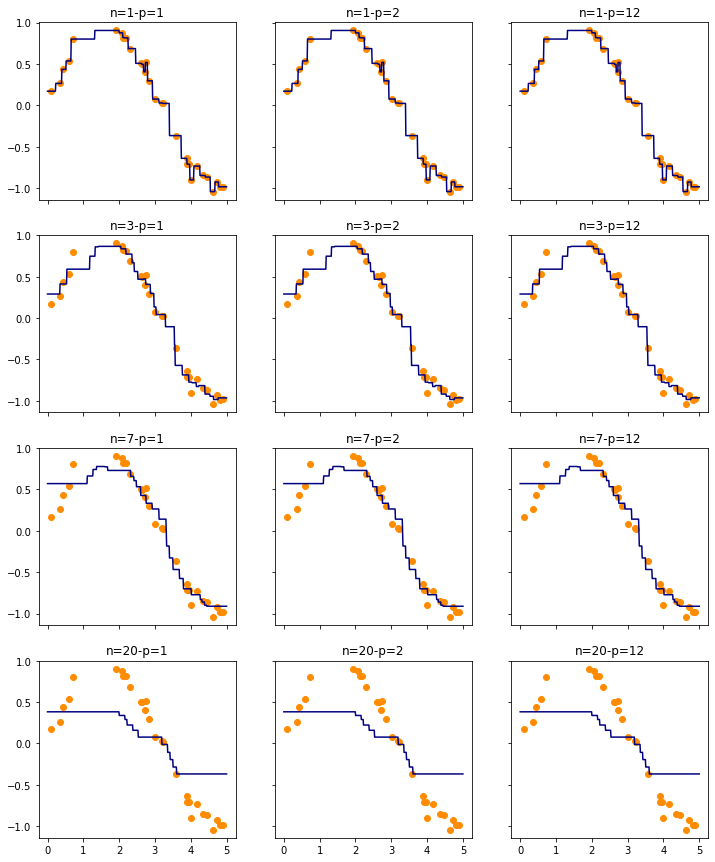

In [8]:
n_neighbors = [1, 3, 7, 20]
n_power = [1, 2, 12]

fig, ax = plt.subplots(len(n_neighbors), len(n_power), sharex='col', sharey='row', figsize=((len(n_power)+1)*3, (len(n_neighbors)+1)*3))
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

for i, neighbors in enumerate(n_neighbors):
    for j, power in enumerate(n_power):
        clf = KNeighborsRegressor(n_neighbors=neighbors, p=power)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        ax[i, j].scatter(X_train, y_train, color='darkorange', label='data')
        ax[i, j].plot(X_test, y_pred, color='navy', label='prediction')
        ax[i, j].set_title("n="+str(neighbors)+"-p="+str(power))
plt.show()

## kNN from scratch - force brut

### Define the dataset

In [9]:
# Define dataset
X, y = make_moons(n_samples=200, noise=0.4, random_state=0)
X = StandardScaler().fit_transform(X)
y = y.reshape(-1, 1)

dataset = np.concatenate((X, y), axis=1)
train, test = train_test_split(dataset, test_size=.5, random_state=42)

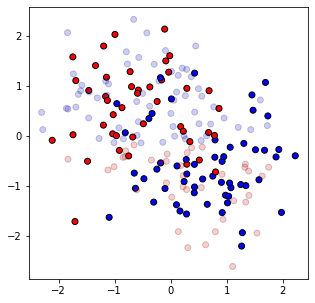

In [10]:
# Plot the training and testing points
plt.figure(figsize=(5, 5))
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(train[:, 0], train[:, 1], c=train[:, -1], cmap=cm_bright, edgecolors='k')
plt.scatter(test[:, 0], test[:, 1], c=test[:, -2], cmap=cm_bright, edgecolors='k', alpha=0.2)
plt.show()

### Step 1: Calculate Euclidean Distance

In [11]:
# calculate the Euclidean distance between two vectors
from math import sqrt
 
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

In [12]:
# print distance between the first element of test set to the 10th first element of train
for row in train[:10]:
    distance = euclidean_distance(test[0,:-1], row[:-1])
    print(distance)

0.00886293919542891
1.045397591464741
1.350070676281334
0.6573564294853871
1.8215091152800857
2.031562341242025
2.2493859974292336
0.4132095942070787
2.328375325366197
1.3205541336786386


### Get Nearest Neighbors

Neighbors for a new piece of data in the dataset are the k closest instances, as defined by our distance measure.

To locate the neighbors for a new piece of data within a dataset we must first calculate the distance between each record in the dataset to the new piece of data. We can do this using our distance function prepared above.

Once distances are calculated, we must sort all of the records in the training dataset by their distance to the new data. We can then select the top k to return as the most similar neighbors.

We can do this by keeping track of the distance for each record in the dataset as a tuple, sort the list of tuples by the distance (in descending order) and then retrieve the neighbors.

In [13]:
# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

In [14]:
# Look at the 3 nearest neighbors from the first element of test set
neighbors = get_neighbors(train, test[0], 3)
for neighbor in neighbors:
    print(neighbor)

[ 1.51479055 -0.27369259  1.        ]
[ 1.57677596 -0.87449506  1.        ]
[ 0.9482417  -0.41261174  1.        ]


### Step 3: Make Predictions

The most similar neighbors collected from the training dataset can be used to make predictions.

In the case of classification, we can return the most represented class among the neighbors.

We can achieve this by performing the max() function on the list of output values from the neighbors. Given a list of class values observed in the neighbors, the max() function takes a set of unique class values and calls the count on the list of class values for each class value in the set.

Below is the function named predict_classification() that implements this.

In [15]:
# Make a classification prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

In [16]:
for i in range(10):
    prediction = predict_classification(train, test[i], 3)
    print('Expected %d, Got %d.' % (test[i, -1], prediction))

Expected 1, Got 1.
Expected 0, Got 0.
Expected 0, Got 0.
Expected 0, Got 0.
Expected 1, Got 1.
Expected 1, Got 1.
Expected 0, Got 0.
Expected 0, Got 0.
Expected 1, Got 1.
Expected 0, Got 0.


### Cost of these approach

* n: number of points in the training dataset
* d: data dimensionality
* k: number of neighbors that we consider for voting


- Training time complexity: O(1)
- Prediction time complexity: O(k * n * d)

## The lab for today

### Use kNN approach for sentiment analysis.

Reuse :
- the previous dataset available
- the pre-processing or work on it
- BOW embedding

In [17]:
TRAIN = pd.read_csv("http://www.i3s.unice.fr/~riveill/dataset/Amazon_Unlocked_Mobile/train.csv.gz")
TEST = pd.read_csv("http://www.i3s.unice.fr/~riveill/dataset/Amazon_Unlocked_Mobile/test.csv.gz")

TRAIN.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,Samsung Galaxy Note 4 N910C Unlocked Cellphone...,Samsung,449.99,4,I love it!!! I absolutely love it!! 👌👍,0.0
1,BLU Energy X Plus Smartphone - With 4000 mAh S...,BLU,139.00,5,I love the BLU phones! This is my second one t...,4.0
2,Apple iPhone 6 128GB Silver AT&T,Apple,599.95,5,Great phone,1.0
3,BLU Advance 4.0L Unlocked Smartphone -US GSM -...,BLU,51.99,4,Very happy with the performance. The apps work...,2.0
4,Huawei P8 Lite US Version- 5 Unlocked Android ...,Huawei,198.99,5,Easy to use great price,0.0


#### Preprocessing

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

# remove stop word (https://en.wikipedia.org/wiki/Stop_word)
stop_word_list = [".", ",", "[", "]", "`", "(", ")", "?", "'", "'s", ":"]
def remove_stop_word(txt_token, stop_word_list):
    return [w for w in txt_token if w not in stop_word_list]

# stem your text
def stemming(txt_token):
    # Creater a stemmer
    porter = nltk.PorterStemmer()
    return [porter.stem(w) for w in txt_token]

# lemmatize your text
def lemmatization(txt_token):
    # Creater a lemmatizer
    #nltk.download('wordnet')
    WNlemma = nltk.WordNetLemmatizer()
    return [WNlemma.lemmatize(w) for w in txt_token]

TRAIN_tokenized_sentences = [
    lemmatization(stemming(remove_stop_word(word_tokenize(row), stop_word_list)))
    for row in TRAIN["Reviews"]
]
TRAIN_tokenized_sentences = list(map(" ".join, TRAIN_tokenized_sentences))

TEST_tokenized_sentences = [
    lemmatization(stemming(remove_stop_word(word_tokenize(row), stop_word_list)))
    for row in TEST["Reviews"]
]
TEST_tokenized_sentences = list(map(" ".join, TEST_tokenized_sentences))

#### Embedding (BOW)

In [19]:
cv = CountVectorizer(binary=True, 
                     analyzer="word", 
                     ngram_range=(1,1), 
                     stop_words="english")

TRAIN_processed = cv.fit_transform(TRAIN_tokenized_sentences)
TEST_processed = cv.transform(TEST_tokenized_sentences)

#### Model

In [20]:
models = []
for neighbors in list(range(5,20)):
    clf = KNeighborsClassifier(n_neighbors=neighbors, p=2)
    # p: power parameter for the Minkowski metric.
    # p = 1 --> manhattan_distance (l1)
    # p = 2 --> euclidean_distance (l2)
    clf.fit(TRAIN_processed.toarray(), TRAIN["Rating"])
    models.append(clf)

In [23]:
len(models)

15

#### Evaluation

In [22]:
models = list(map(lambda model: model.predict(TEST_processed.toarray()), models))

In [24]:
accuracy_scores = list(map(lambda y_pred: accuracy_score(TEST["Rating"], y_pred), models))

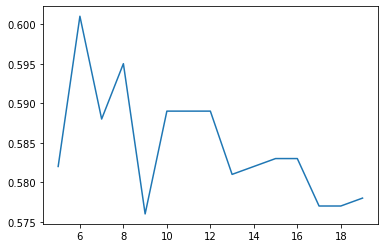

In [35]:
plt.plot(np.arange(5, 20), accuracy_scores)

In [32]:
max(accuracy_scores)

0.601

#### What is your conclusion

| Model | Accuracy Score |
| --- | --- | 
| logistic regression + CountVectorizer | 0.666 | 
| logistic regression + lemmatization/stemming + CountVectorizer | 0.647 | 
| shallow neural network + TfidVectorizer | 0.659 | 
| shallow neural network + embedding layer | 0.54 | 
| MLP classifier | 0.535 |
| KNN w/ 6 neighbors | 0.601 | 

For the moment, the logistic regression with CountVectorizer remains the one with the best accuracy.

### Use kNN for Predicting Hospital Readmission

To change a little bit we will use another set of data on which it is possible to conduct a lot of data. This is the [MIMIC III dataset](https://mimic.physionet.org/). We will use a very small part of it.

#### load dataset¶

In [223]:
import pandas as pd

df_train = pd.read_csv("http://www.i3s.unice.fr/~riveill/dataset/MIMIC-III-readmission/train.csv.zip")
df_test = pd.read_csv("http://www.i3s.unice.fr/~riveill/dataset/MIMIC-III-readmission/test.csv.zip")
df_train.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DAYS_NEXT_ADMIT,NEXT_ADMITTIME,ADMISSION_TYPE,DEATHTIME,DISCHARGE_LOCATION,INSURANCE,...,mental,misc,muscular,neoplasms,nervous,pregnancy,prenatal,respiratory,skin,OUTPUT_LABEL
0,937,148592,2163-01-20 18:39:00,2163-01-24 08:00:00,0.061806,2163-01-24 09:29:00,EMERGENCY,2163-01-26 08:00:00,DEAD/EXPIRED,Medicare,...,0,0,0,0,1,0,0,0,0,1
1,3016,159142,2107-01-23 02:45:00,2107-01-26 14:00:00,NaN,NaN,EMERGENCY,NaN,HOME HEALTH CARE,Medicare,...,2,0,0,0,0,0,0,1,0,0
2,2187,186282,2134-06-24 23:30:00,2134-07-02 17:45:00,NaN,NaN,EMERGENCY,NaN,REHAB/DISTINCT PART HOSP,Medicaid,...,1,2,1,0,3,0,0,4,0,0
3,19213,140312,2202-11-02 12:32:00,2202-11-05 14:20:00,12.968056,2202-11-18 13:34:00,EMERGENCY,NaN,HOME,Medicare,...,0,0,0,0,0,0,0,1,1,1
4,425,118058,2149-05-13 12:23:00,2149-05-26 20:00:00,NaN,NaN,EMERGENCY,NaN,HOME HEALTH CARE,Medicare,...,0,0,0,0,0,0,0,2,1,0


#### Some explaination about columns

* Key
    * **SUBJECT_ID**
    * **HADM_ID**
 
* Patient 
    * **DOB:** Date of Birth
    * **GENDER**
    * **MARITAL_STATUS**
    * **ETHNICITY**
    * **INSURANCE**
    * **DEATHTIME:** Date of Death (if the patient has died)

* Admission
    * **ADMITTIME:** date of the admission
    * **ADMISSION_TYPE:** type of the admission
    * **DIAGNOSIS:** diagnosis made on admission
    * **['blood', 'circulatory', 'congenital', 'digestive',
       'endocrine', 'genitourinary', 'infectious', 'injury', 'mental', 'misc',
       'muscular', 'neoplasms', 'nervous', 'pregnancy', 'prenatal',
       'respiratory', 'skin']:** bag of word representation of DIAGNOSIS

* Discharge
    * **DISCHTIME:** date of the discharge
    * **DISCHARGE_LOCATION:** patient's destination after discharge from hospital
    * **TEXT:**discharge medical report

* Readmission
    * **DAYS_NEXT_ADMIT:** number of day beetween discharge and readmission
    * **NEXT_ADMITTIME:** date of the readmission
    * **OUTPUT_LABEL:** 0 if the patient has not been re-admitted / 1 if the patient has been re-admitted



In [224]:
df_train.columns

Index(['SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME', 'DAYS_NEXT_ADMIT',
       'NEXT_ADMITTIME', 'ADMISSION_TYPE', 'DEATHTIME', 'DISCHARGE_LOCATION',
       'INSURANCE', 'MARITAL_STATUS', 'ETHNICITY', 'DIAGNOSIS', 'TEXT',
       'GENDER', 'DOB', 'blood', 'circulatory', 'congenital', 'digestive',
       'endocrine', 'genitourinary', 'infectious', 'injury', 'mental', 'misc',
       'muscular', 'neoplasms', 'nervous', 'pregnancy', 'prenatal',
       'respiratory', 'skin', 'OUTPUT_LABEL'],
      dtype='object')

#### Your work

Using the following columns ['DOB', 'GENDER', 'MARITAL_STATUS', 'ETHNICITY', 'INSURANCE', 'ADMISSION_TYPE', 
'blood', 'circulatory', 'congenital', 'digestive', 'endocrine', 'genitourinary', 'infectious', 'injury', 'mental', 'misc', 'muscular', 'neoplasms', 'nervous', 'pregnancy', 'prenatal', 'respiratory', 'skin'], construct a model predicting the risk of a patient being hospitalized ['OUTPUT_LABEL']. Plot the ROC-AUC curve.

In [225]:
import warnings
warnings.filterwarnings("ignore")

train_features = df_train[['DOB', 'GENDER', 'MARITAL_STATUS', 'ETHNICITY', 'INSURANCE', 'ADMISSION_TYPE', 
                           'blood', 'circulatory', 'congenital', 'digestive', 'endocrine', 'genitourinary', 
                           'infectious', 'injury', 'mental', 'misc', 'muscular', 'neoplasms', 'nervous', 
                           'pregnancy', 'prenatal', 'respiratory', 'skin']]
train_labels = df_train["OUTPUT_LABEL"]

test_features = df_test[['DOB', 'GENDER', 'MARITAL_STATUS', 'ETHNICITY', 'INSURANCE', 'ADMISSION_TYPE', 
                         'blood', 'circulatory', 'congenital', 'digestive', 'endocrine', 'genitourinary', 
                         'infectious', 'injury', 'mental', 'misc', 'muscular', 'neoplasms', 'nervous', 
                         'pregnancy', 'prenatal', 'respiratory', 'skin']]
test_labels = df_test["OUTPUT_LABEL"]

In [226]:
# for col in train_features.columns:
#     print(train_features[col].unique())
# train_features[train_features.isna().any(axis=1)]

# After a quick check, the only column with NaN values is MARITAL_STATUS
# We replace all the NaN with UNKNOWN (DEFAULT)

train_features["MARITAL_STATUS"].fillna("UNKNOWN (DEFAULT)", inplace=True)

# Same for the test_features
test_features["MARITAL_STATUS"].fillna("UNKNOWN (DEFAULT)", inplace=True)

In [227]:
# process the DOB column into a timedelta (in year) column
# One-hot encode text features
def preprocess_dataset(dataset):
    dataset["MAX"] = dataset["DOB"].max()
    dataset["DOB"] = pd.DatetimeIndex(dataset["DOB"]).year
    dataset["MAX"] = pd.DatetimeIndex(dataset["MAX"]).year
    dataset["DIFF"] = dataset["MAX"] - dataset["DOB"]
    dataset.drop(["DOB", "MAX"], axis=1, inplace=True)
    for col in ["GENDER", "MARITAL_STATUS", "ETHNICITY", "INSURANCE", "ADMISSION_TYPE"]:
        dataset = pd.concat([dataset,pd.get_dummies(dataset[col], prefix=col)],axis=1)
        dataset.drop([col],axis=1, inplace=True)
    return dataset

In [228]:
train_features = preprocess_dataset(train_features)
test_features = preprocess_dataset(test_features)

In [260]:
models = []
for neighbors in list(range(2,30)):
    clf = KNeighborsClassifier(n_neighbors=neighbors, p=1, weights="distance", algorithm="ball_tree")
    clf.fit(train_features, train_labels)
    models.append(clf)

In [261]:
models = list(map(lambda model: model.predict(test_features), models))

In [262]:
accuracy_scores = list(map(lambda y_pred: accuracy_score(test_labels, y_pred), models))

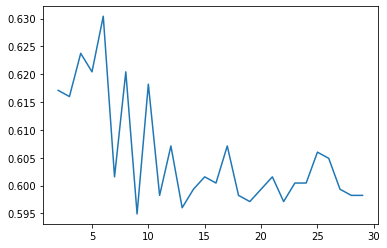

In [263]:
plt.plot(np.arange(2, 30), accuracy_scores)

In [264]:
max(accuracy_scores)

0.6304106548279689